## We use a dataset of 4898 wines and its 12 correspondent attributes to build a RANDOM FOREST model that will predict the quality of wine 

![image of wine](https://i0.wp.com/socialvignerons.com/wp-content/uploads/2016/09/priorat-wine-nature-gratavinum-vines-set.jpg?resize=787%2C443)

In [3]:
#Import modules and build dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\nique\\PycharmProjects\\untitled\\mlintro\\data\\winequality-white.csv', 
                 names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"], 
                 skiprows = 1, sep = ';', engine = 'python')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(4898, 12)

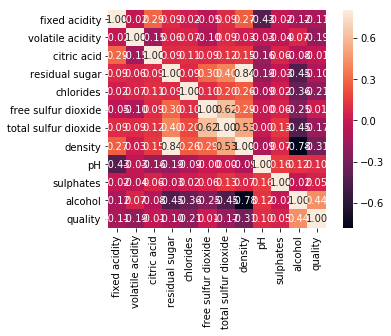

In [5]:
#Open graph modules to build corr matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrmat = df.corr()
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '.2f')
plt.show()

In [6]:
#Begin to build our classifier
X = df.drop(['quality'], axis = 1) #we use all columns except the one we are dropping, to be used as response column
y = df['quality']

#IMPORTANT NOTE: we could get even better results by dropping cols that are not strongly correlated with quality, as below
# X = df.drop(['quality','density', 'total sulfur dioxide', 'sulphates', 'chlorides', 'volatile acidity'], axis = 1) #we use all columns except the one we are dropping, to be used as response column
# y = df['quality']
#For the purpose of this exercise, however, we'll leave the code "as is"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
#no we instantiate our classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30, max_depth = 20, random_state = 15) #here we have tweaked the params for better results!
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [19]:
# now we train the model by fitting the data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [20]:
#we print the score to see how accurate our model is
# score = clf.score(X_test, y_test)
# score

In [21]:
#we print the score to see how accurate our model is
score = clf.score(X_test, y_test)
score

0.636734693877551